<a href="https://colab.research.google.com/github/SoumyadeepB/Reinforcement-Learning/blob/master/N_step_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline


In [0]:
def nstep_sarsa(env, n=1, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):

    """ TODO: implement the n-step sarsa algorithm """
    
    total_episode_length = 0
    for ep in tqdm(range(num_ep)):      
      state = env.reset()
      obs = env.reset()
      n_states = env.observation_space.n
      n_actions = env.action_space.n
      Q = np.random.rand(n_states,n_actions)   # Initializing random Q values for each (s,a)
      policy = np.argmax(Q,axis=1)          # Greedy policy based on the Q(s,a)     

      done = False
      t = 0
      tau = 0
      G=0
      T = np.inf

      states = [0]
      actions = [policy[0]]
      rewards = [0]
      
      while not done:
        if t < T:
          A = actions[t]   # take action A_t
          S , R , done , _ =  env.step(A)
          states.append(S)
          actions.append(A)
          rewards.append(R)

          if done:
            T = t+1
          else:
            actions.append(policy[S])  # action corresponding to current state S

        tau = t - n + 1
        if tau >= 0:
          for i in range(tau+1,min((tau+n,T))):
            R_i = rewards[i]
            G += ((gamma ** (i-tau-1)) * R_i)
          
          if (tau+n) < T:
            G = G + (gamma**n) * Q[states[tau+n], actions[tau+n]]

          Q[states[tau],actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])
          policy = np.argmax(Q,axis=1) # Update Policy (Greedy)

        t += 1

      
      total_episode_length += t
        
    avg_ep_length = (total_episode_length/num_ep) 
    print("N =",n," ||  α = {:.2f}".format(alpha)," || Avg. Episode_length =",avg_ep_length)
    return avg_ep_length


In [3]:
env=gym.make('FrozenLake-v0', map_name="8x8")
# TODO: run multiple times, evaluate the performance for different n and alpha
alphas = np.linspace(0.1,1,10)
lst = []
for n in range(10):
  for alpha in alphas:
    avg_ep_length = nstep_sarsa(env, n=n, alpha=alpha)
    lst.append((n,alpha,avg_ep_length))


N = 0  ||  α = 0.10  || Avg. Episode_length = 45.6095



N = 0  ||  α = 0.20  || Avg. Episode_length = 44.9129



N = 0  ||  α = 0.30  || Avg. Episode_length = 46.02



N = 0  ||  α = 0.40  || Avg. Episode_length = 45.755



N = 0  ||  α = 0.50  || Avg. Episode_length = 45.7747



N = 0  ||  α = 0.60  || Avg. Episode_length = 46.1329



N = 0  ||  α = 0.70  || Avg. Episode_length = 45.2722



N = 0  ||  α = 0.80  || Avg. Episode_length = 45.3238



N = 0  ||  α = 0.90  || Avg. Episode_length = 45.1248



N = 0  ||  α = 1.00  || Avg. Episode_length = 44.974



N = 1  ||  α = 0.10  || Avg. Episode_length = 43.5729



N = 1  ||  α = 0.20  || Avg. Episode_length = 43.9144



N = 1  ||  α = 0.30  || Avg. Episode_length = 44.0063



N = 1  ||  α = 0.40  || Avg. Episode_length = 43.6585



N = 1  ||  α = 0.50  || Avg. Episode_length = 42.9573



N = 1  ||  α = 0.60  || Avg. Episode_length = 42.1838



N = 1  ||  α = 0.70  || Avg. Episode_length = 42.5562



N = 1  ||  α = 0.80  || Avg. Episode_length = 41.8807



N = 1  ||  α = 0.90  || Avg. Episode_length = 41.9799



N = 1  ||  α = 1.00  || Avg. Episode_length = 40.7744



N = 2  ||  α = 0.10  || Avg. Episode_length = 42.0554



N = 2  ||  α = 0.20  || Avg. Episode_length = 42.8425



N = 2  ||  α = 0.30  || Avg. Episode_length = 42.6324



N = 2  ||  α = 0.40  || Avg. Episode_length = 42.3663



N = 2  ||  α = 0.50  || Avg. Episode_length = 41.8433



N = 2  ||  α = 0.60  || Avg. Episode_length = 42.0416



N = 2  ||  α = 0.70  || Avg. Episode_length = 41.4337



N = 2  ||  α = 0.80  || Avg. Episode_length = 41.0511



N = 2  ||  α = 0.90  || Avg. Episode_length = 41.2722



N = 2  ||  α = 1.00  || Avg. Episode_length = 41.0226



N = 3  ||  α = 0.10  || Avg. Episode_length = 42.0367



N = 3  ||  α = 0.20  || Avg. Episode_length = 42.1691



N = 3  ||  α = 0.30  || Avg. Episode_length = 41.5949



N = 3  ||  α = 0.40  || Avg. Episode_length = 41.3905



N = 3  ||  α = 0.50  || Avg. Episode_length = 40.9142



N = 3  ||  α = 0.60  || Avg. Episode_length = 40.9604



N = 3  ||  α = 0.70  || Avg. Episode_length = 40.8381



N = 3  ||  α = 0.80  || Avg. Episode_length = 40.8109



N = 3  ||  α = 0.90  || Avg. Episode_length = 40.6677



N = 3  ||  α = 1.00  || Avg. Episode_length = 40.0187



N = 4  ||  α = 0.10  || Avg. Episode_length = 41.5067



N = 4  ||  α = 0.20  || Avg. Episode_length = 41.2533



N = 4  ||  α = 0.30  || Avg. Episode_length = 41.4477



N = 4  ||  α = 0.40  || Avg. Episode_length = 40.7453



N = 4  ||  α = 0.50  || Avg. Episode_length = 41.2076



N = 4  ||  α = 0.60  || Avg. Episode_length = 40.6375



N = 4  ||  α = 0.70  || Avg. Episode_length = 40.5254



N = 4  ||  α = 0.80  || Avg. Episode_length = 40.7655



N = 4  ||  α = 0.90  || Avg. Episode_length = 40.0442



N = 4  ||  α = 1.00  || Avg. Episode_length = 40.0683



N = 5  ||  α = 0.10  || Avg. Episode_length = 41.436



N = 5  ||  α = 0.20  || Avg. Episode_length = 40.6817



N = 5  ||  α = 0.30  || Avg. Episode_length = 40.9063



N = 5  ||  α = 0.40  || Avg. Episode_length = 40.8506



N = 5  ||  α = 0.50  || Avg. Episode_length = 40.937



N = 5  ||  α = 0.60  || Avg. Episode_length = 40.4958



N = 5  ||  α = 0.70  || Avg. Episode_length = 40.6764



N = 5  ||  α = 0.80  || Avg. Episode_length = 40.2694



N = 5  ||  α = 0.90  || Avg. Episode_length = 40.6772



N = 5  ||  α = 1.00  || Avg. Episode_length = 39.8443



N = 6  ||  α = 0.10  || Avg. Episode_length = 40.8526



N = 6  ||  α = 0.20  || Avg. Episode_length = 41.1645



N = 6  ||  α = 0.30  || Avg. Episode_length = 40.4



N = 6  ||  α = 0.40  || Avg. Episode_length = 40.2494



N = 6  ||  α = 0.50  || Avg. Episode_length = 40.2175



N = 6  ||  α = 0.60  || Avg. Episode_length = 40.8274



N = 6  ||  α = 0.70  || Avg. Episode_length = 40.4474



N = 6  ||  α = 0.80  || Avg. Episode_length = 40.2805



N = 6  ||  α = 0.90  || Avg. Episode_length = 40.0594



N = 6  ||  α = 1.00  || Avg. Episode_length = 39.8949



N = 7  ||  α = 0.10  || Avg. Episode_length = 40.6352



N = 7  ||  α = 0.20  || Avg. Episode_length = 40.4024



N = 7  ||  α = 0.30  || Avg. Episode_length = 40.5843



N = 7  ||  α = 0.40  || Avg. Episode_length = 40.2931



N = 7  ||  α = 0.50  || Avg. Episode_length = 40.1647



N = 7  ||  α = 0.60  || Avg. Episode_length = 40.287



N = 7  ||  α = 0.70  || Avg. Episode_length = 40.409



N = 7  ||  α = 0.80  || Avg. Episode_length = 39.613



N = 7  ||  α = 0.90  || Avg. Episode_length = 40.2373



N = 7  ||  α = 1.00  || Avg. Episode_length = 39.5395



N = 8  ||  α = 0.10  || Avg. Episode_length = 40.3171



N = 8  ||  α = 0.20  || Avg. Episode_length = 40.3825



N = 8  ||  α = 0.30  || Avg. Episode_length = 40.6776



N = 8  ||  α = 0.40  || Avg. Episode_length = 39.8925



N = 8  ||  α = 0.50  || Avg. Episode_length = 40.0726



N = 8  ||  α = 0.60  || Avg. Episode_length = 39.8294



N = 8  ||  α = 0.70  || Avg. Episode_length = 39.4146



N = 8  ||  α = 0.80  || Avg. Episode_length = 39.6524



N = 8  ||  α = 0.90  || Avg. Episode_length = 39.2184



N = 8  ||  α = 1.00  || Avg. Episode_length = 39.8544



N = 9  ||  α = 0.10  || Avg. Episode_length = 39.7462



N = 9  ||  α = 0.20  || Avg. Episode_length = 40.148



N = 9  ||  α = 0.30  || Avg. Episode_length = 39.6144



N = 9  ||  α = 0.40  || Avg. Episode_length = 40.1679



N = 9  ||  α = 0.50  || Avg. Episode_length = 39.7843



N = 9  ||  α = 0.60  || Avg. Episode_length = 39.5533



N = 9  ||  α = 0.70  || Avg. Episode_length = 39.727



N = 9  ||  α = 0.80  || Avg. Episode_length = 39.685



N = 9  ||  α = 0.90  || Avg. Episode_length = 39.5953



N = 9  ||  α = 1.00  || Avg. Episode_length = 39.5336


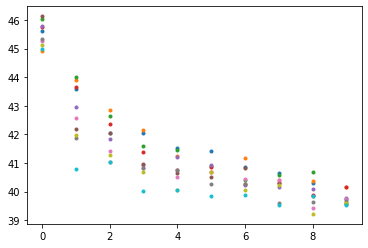

In [4]:
%matplotlib inline
for n,alpha,avg_ep in lst:
  plt.plot(n,avg_ep,'.-',label="n={}".format(n))

plt.show()

In [0]:
L = []
lst1 = [(alpha,ep) for _,alpha,ep in lst]
for i in range(10):
  L.append(lst1[i*10:(i+1)*10])


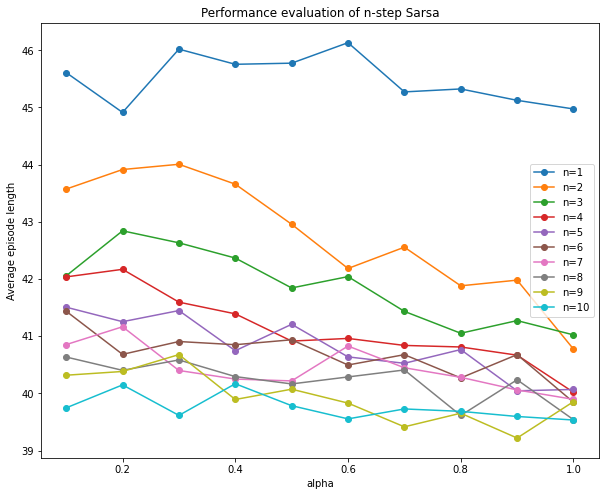

In [6]:
%matplotlib inline
plt.figure(figsize=(10,8))
n=1
for l in L:
  x = []
  y = []
  for alpha,ep in l:
    x.append(alpha)
    y.append(ep)

  plt.plot(x,y,'o-',label="n={}".format(n))
  n +=1

plt.title("Performance evaluation of n-step Sarsa")
plt.xlabel("alpha")
plt.ylabel("Average episode length")
plt.legend()
plt.show()
  
